# Building_Model

### 1. Setup

In [ ]:
# Install and import all necessary libraries for building model

#!pip install tensorflow opencv-python matplotlib

import tensorflow as tf  # for building and training neural network
import os  # access files from system to code
import cv2  # for image processing
import imghdr  # to acess file extentions
import numpy as np  # for numerical operaions
from matplotlib import pyplot as plt  # for visual representation
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy  # to calculate metrics
from tensorflow.keras.models import load_model # to save and open saved models
from tensorflow.keras.models import Sequential  # model for neural network
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  # layers of neural network

### 2. Load Data

In [2]:
data_dir='Data'  # directory in system where training data is stored
image_exts=['jpeg','jpg','bmp','png'] # valid file extentions
# 'Data' has image_class: 'happy' and 'sad'
# To remove invalid extention images from folder
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path= os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)  
            tip = imghdr.what(image_path)  # tip has file extention of image
            if tip not in image_exts:
                os.remove(image_path)  # removes image from folder
        except Exception as e:
            print('Issue with image {}'.format(image_path))

### 3. Pre-processing Data

Found 236 files belonging to 2 classes.


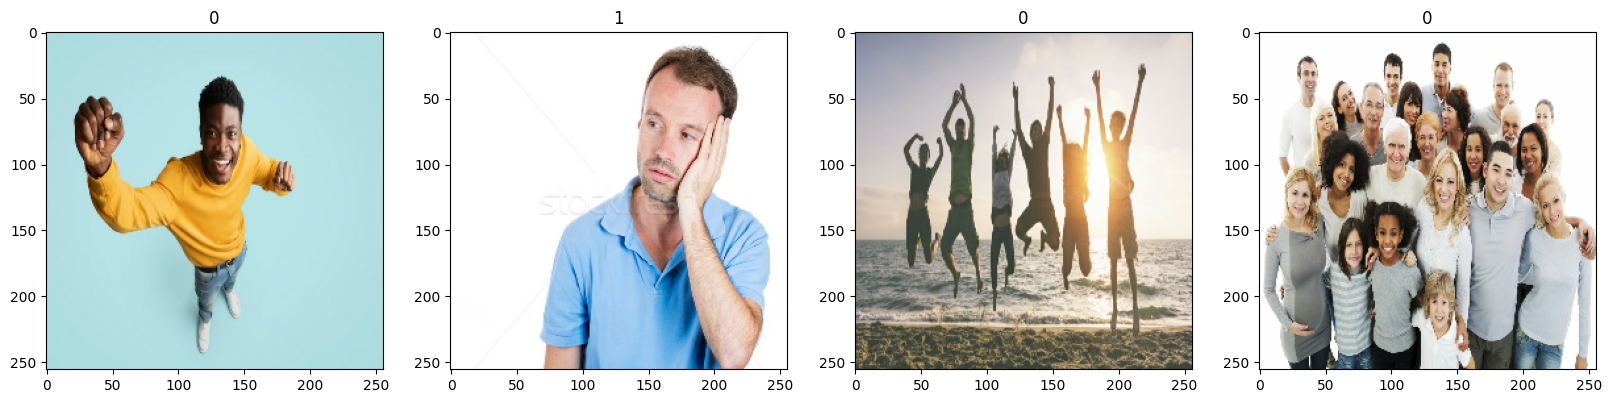

In [3]:
tf.data.Dataset
data = tf.keras.utils.image_dataset_from_directory('Data')
data = data.map(lambda x,y: (x/255,y)) # data is divided in values between 0,1
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()  # dataset is divided into batches with each batch having 32 images

# displays few images from first batch
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 4. Data Split

In [4]:
train_size = int(len(data) * 0.7)   # 70% of data is split for training
val_size = int(len(data) * 0.2) +1  # 20% for evaluation
test_size = int(len(data) * .1) +1  # 10% for testing

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

print(train_size+val_size+test_size == len(data)) # if True then whole data is split properly

True


### 5. Build Deep Model

In [5]:
# Building neural network
# The model is Sequential ie data flows layer to layer after previous layer is completed
model = Sequential()

# Three Convolutional layers
model.add(Conv2D(16, (3,3),1,activation='relu',input_shape=(256,256,3)))  
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3),1,activation='relu'))
model.add(MaxPooling2D())

# One Flatten layer
model.add(Flatten())

# One Dense layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()

c:\Users\F-HymavathiM\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### 6. Train Model

In [6]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# Training model on dataset where epochs should be selected appropriatly
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]) 

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 559ms/step - accuracy: 0.6523 - loss: 1.4281 - val_accuracy: 0.7812 - val_loss: 0.6677
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7076 - loss: 0.6029 - val_accuracy: 0.6562 - val_loss: 0.5396
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7211 - loss: 0.4756 - val_accuracy: 0.7969 - val_loss: 0.4173
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 850ms/step - accuracy: 0.7495 - loss: 0.4769 - val_accuracy: 0.7031 - val_loss: 0.5550
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7817 - loss: 0.4115 - val_accuracy: 0.7500 - val_loss: 0.5519
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7932 - loss: 0.5073 - val_accuracy: 0.7031 - val_loss: 0.4854
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7832 - loss: 0.3863 - val_accuracy: 0.8125 - val_loss: 0.4101
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8521 - loss: 0.3197 - val_accuracy: 0.9219 - val_loss: 0.2765
Epoch 9/20

### 7. Plot Performance

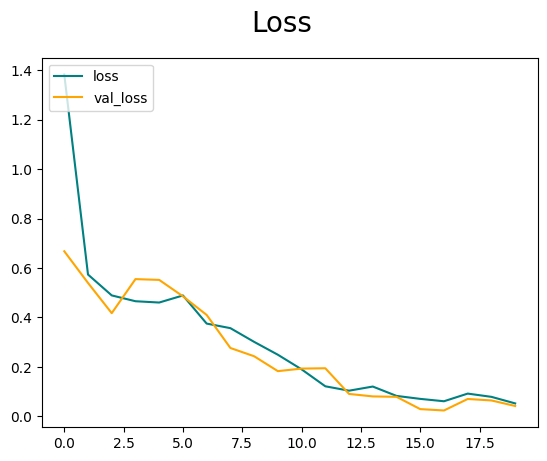

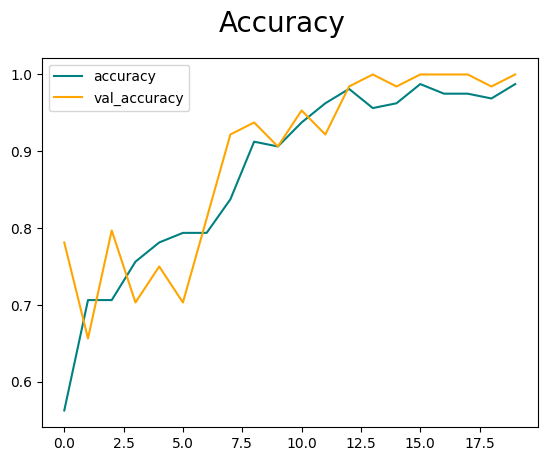

In [7]:
# Graph on Loss vs Epochs
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Graph on Accuracy vs Epochs
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

### 8. Evaluate Performance

In [8]:
# Evaluates performance as Precision, Accuracy, Recall
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y,yhat)
    
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Precision: 1.0, Recall: 1.0, Accuracy: 1.0


### 9. Test

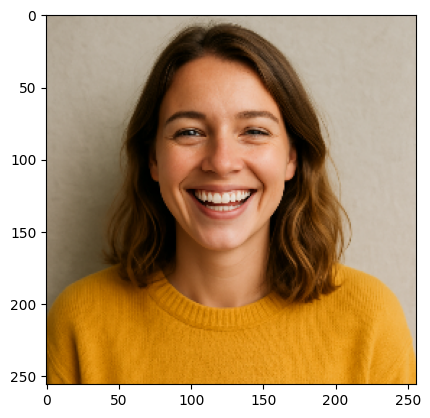

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[9.208869e-05]]
HAPPY :)) 


In [9]:
# Test the Model on selected image
img = cv2.imread('Test_images\\Test1.jpg')
resize = tf.image.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255,0))
print(yhat)
# yhat: closer to 1 is sad    closer to 0 is happy
if yhat > 0.5:
    print('SAD :(( ')
else:
    print('HAPPY :)) ')

### Save Model

In [ ]:
# Save the trained Model
model.save(os.path.join('models','happysadmodel3.h5'))

# Load the pre-trained model
new_model = load_model(os.path.join('models','happysadmodel.h5'))

# SENTI-VISION MODEL

### Setup

In [10]:
# Import libraries necessary for Senti-Vision
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np

# Load pre-trained model
new_model = load_model(os.path.join('models','happysadmodel.h5'))

### 1.Single Image

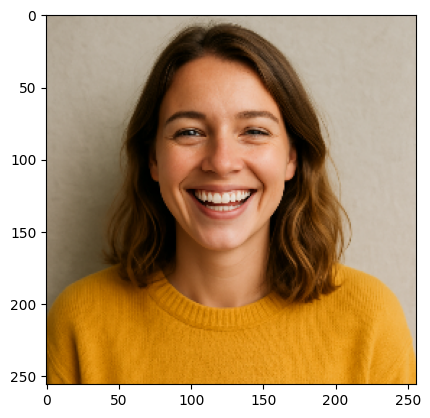

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[[2.5682955e-05]]
HAPPY :)


In [11]:
img = cv2.imread('Test_images\\Test1.jpg') # Load image to be tested
resize = tf.image.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),(256,256))
plt.imshow(resize.numpy().astype(int)) # Display loaded images
plt.show()
# predict the emotion
yhatnew = new_model.predict(np.expand_dims(resize/255,0))
print(yhatnew)

if yhatnew > 0.5:
    ans='SAD :( '
else:
    ans='HAPPY :)'
# Display the analysis
print(ans)

### 2.Face Detection

GIVEN IMAGE:


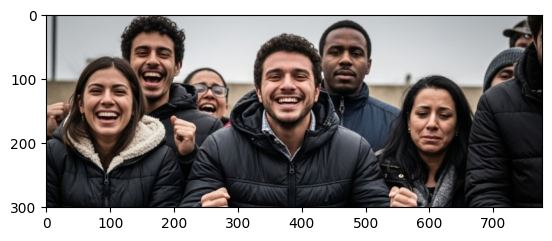

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

AFTER SENTIMENT ANALYSIS:
Faces Detected: 5
Satisfied (Green) : 3
Not-satisfied (Red) : 2 



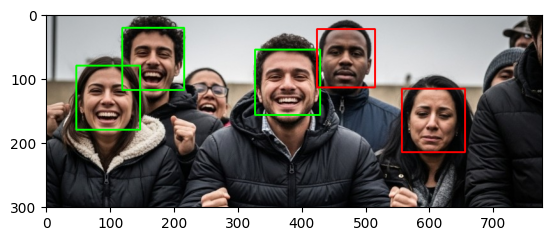

In [12]:
# Load pre-trained model Haarcascade for face detection
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
happy=sad=0

img = cv2.imread('Group_images\\Group4.jpg') # Select image for analysis

print("GIVEN IMAGE:")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=face_cascade.detectMultiScale(gray,1.3,6) # Detecting faces using model

for (x,y,w,h) in faces:
    face_crop = img[y:y+h+10, x:x+w+10]  # cropped individual face images
    cv2.imwrite(f'Faces\\face.jpg', face_crop) # store face in folder
    face=cv2.imread('Faces\\face.jpg')

    resize = tf.image.resize(cv2.cvtColor(face, cv2.COLOR_BGR2RGB),(256,256))
    yhatnew = new_model.predict(np.expand_dims(resize/255,0))
    ##print(yhatnew)

    # Predict the emotion
    if yhatnew > 0.35:
        sad+=1
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)  # (0,0,255) is red rectangle over sad face (BGR)
    else:
        happy+=1
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)  # (0,255,0) is green rectangle over happy face (BGR)

print('\nAFTER SENTIMENT ANALYSIS:')
print('Faces Detected:',len(faces))
print('Satisfied (Green) :',happy)
print(f'Not-satisfied (Red) : {sad} \n')

# Image after Analysis
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

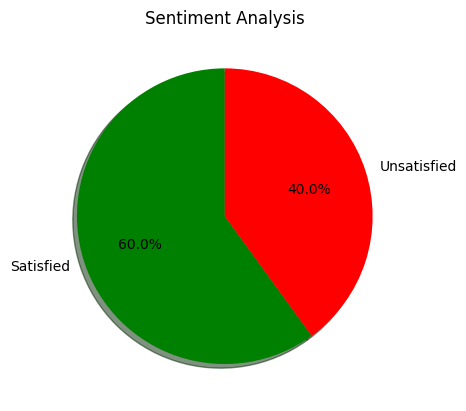


SATISFACTION RATE:
60.0 %
Good Review! People enjoyed the event but needs little better management.


In [13]:
# PIE Chart for representation of analysis
lab = ['Satisfied', 'Unsatisfied']
num = [happy,sad] 
col = ['green', 'red']

# pie-chart
plt.pie(num, labels=lab, colors=col, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Sentiment Analysis') 
plt.show()

# satisfaction rate = (Happy faces / Faces detected) * 100 
s_rate=happy/len(faces) *100

print('\nSATISFACTION RATE:')
print(f'{s_rate} %' )

# Custom reviews
if s_rate>=75:
    print('Excellent Review! Most people enjoyed the event.')
elif s_rate>=50:
    print('Good Review! People enjoyed the event but needs little better management.')
elif s_rate>=25:
    print('OK Review! Very less people enjoyed, improvement in management is needed.')
else:
    print('Bad Review! Need lot of improvement in managing and events.')


### 4.Album

In [14]:
# Test Images in a album
happy=[] # list of happy images 
sad=[] # list of sad images

test='Test_images' # folder with test images

for img in os.listdir(test):
    img_path=os.path.join(test,img)
    img = cv2.imread(img_path)
    resize = tf.image.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),(256,256))
    yhatnew = new_model.predict(np.expand_dims(resize/255,0))
    #print(yhatnew)
    if yhatnew > 0.5:
        sad.append(img_path)
    else:
        happy.append(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


HAPPY!!
Number of people who look satisfied: 3


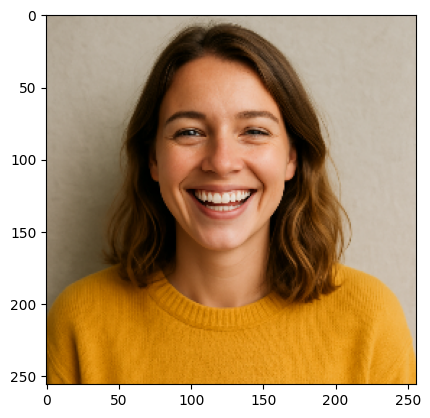

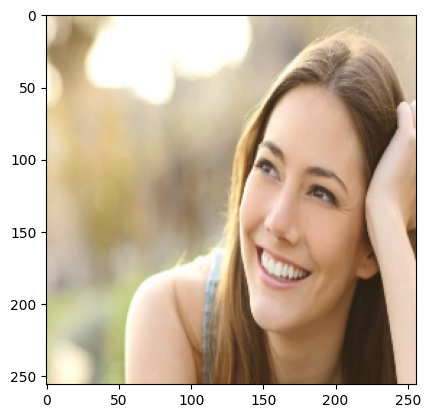

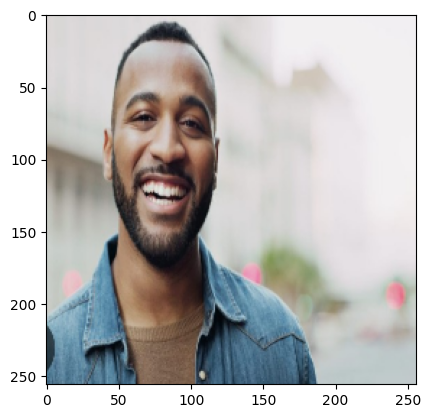

In [15]:
print('HAPPY!!')
print('Number of people who look satisfied:',len(happy))

# Display all the happy images from selected folder
for i in happy:
    img = cv2.imread(i)
    resize = tf.image.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),(256,256))
    plt.imshow(resize.numpy().astype(int))
    plt.show()
    print()

SAD!!
Number of people who look unsatisfied: 3


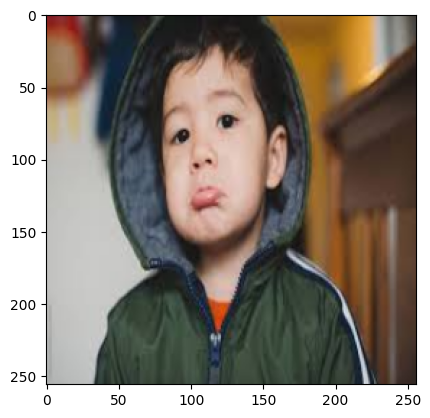

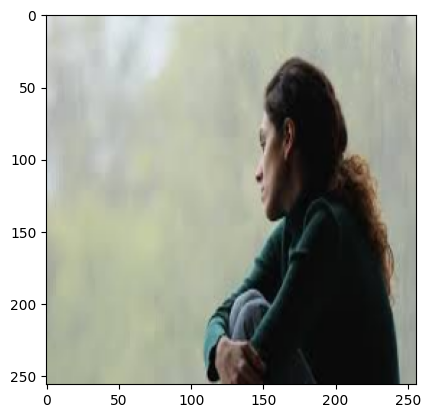

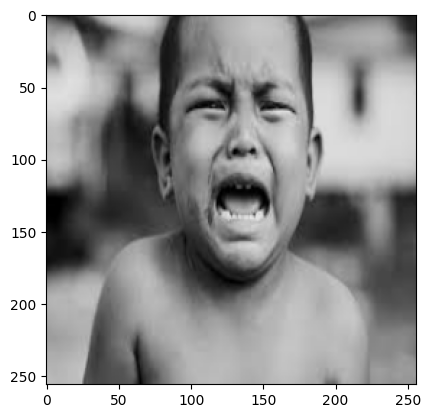

In [16]:
print('SAD!!')
print('Number of people who look unsatisfied:',len(sad))

# Display all sad images from selected folder
for i in sad:
    img = cv2.imread(i)
    resize = tf.image.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),(256,256))
    plt.imshow(resize.numpy().astype(int))
    plt.show()
    print()

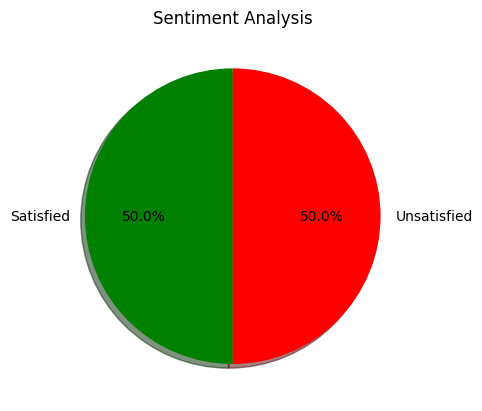

In [17]:
# PIE-Chart analysis for images in selected folder
lab = ['Satisfied', 'Unsatisfied']
num = [len(happy),len(sad)] 
col = ['green', 'red']

plt.pie(num, labels=lab, colors=col, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Sentiment Analysis') 
plt.show()

### Video Frames

In [ ]:
# OPTIONAL
# To Capture images as frames from a selected video for sentiment analysis
vs=cv2.VideoCapture('Test1.mp4')  
prop = cv2.CAP_PROP_FRAME_COUNT  
total = int(vs.get(prop))  # total frames
print(f'{total} total frame in video')

count=1
ret , img = vs.read()
while ret:
    ret , img = vs.read()
    # Saving every 10th frame in our video
    if count%10==0:
        image_path = os.path.join('Frames',f'Frame{str(count)}.jpg')
        cv2.imwrite(image_path,img)
    #print('Read a new Frame:',ret,count)
    count+=1
# Perform Sentiment Analysis on this Folder which has Frames of a video